In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape images to (28, 28, 1) for CNN input
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Convert labels to categorical (One-hot encoding)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def create_lenet():
    model = models.Sequential()

    # C1: First Convolutional Layer
    model.add(layers.Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1), padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))

    # C2: Second Convolutional Layer
    model.add(layers.Conv2D(16, kernel_size=(5,5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))

    # Flatten layer
    model.add(layers.Flatten())

    # F1: Fully Connected Layer
    model.add(layers.Dense(120, activation='tanh'))

    # F2: Fully Connected Layer
    model.add(layers.Dense(84, activation='tanh'))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for MNIST

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [4]:
# Create LeNet model
lenet_model = create_lenet()

# Train Model
history = lenet_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.8465 - loss: 0.5392 - val_accuracy: 0.9578 - val_loss: 0.1415
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9622 - loss: 0.1221 - val_accuracy: 0.9722 - val_loss: 0.0953
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9766 - loss: 0.0762 - val_accuracy: 0.9753 - val_loss: 0.0796
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9829 - loss: 0.0549 - val_accuracy: 0.9792 - val_loss: 0.0670
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9867 - loss: 0.0409 - val_accuracy: 0.9782 - val_loss: 0.0703
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9895 - loss: 0.0315 - val_accuracy: 0.9828 - val_loss: 0.0571
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9919 - loss: 0.0255 - val_accuracy: 0.9827 - val_loss: 0.0624
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9932 - loss: 0.0211 - 

In [5]:
# Evaluate the model
test_loss, test_acc = lenet_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


313/313 - 3s - 9ms/step - accuracy: 0.9846 - loss: 0.0529
Test accuracy: 0.9846


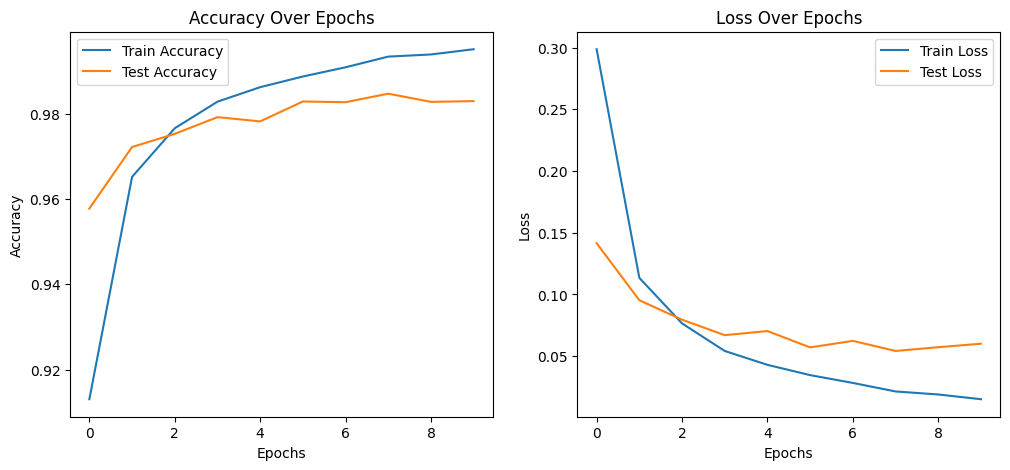

In [7]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()
